# S&P 500 週足

In [30]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'GSPC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-13 00:00:00-04:00,3894.010010,3964.459961,3838.239990,3916.639893,27309950000,0.0,0.0
2023-03-20 00:00:00-04:00,3917.469971,4039.489990,3909.159912,3970.989990,24375960000,0.0,0.0
2023-03-27 00:00:00-04:00,3982.929932,4110.750000,3951.530029,4109.310059,20849370000,0.0,0.0
2023-04-03 00:00:00-04:00,4102.200195,4133.129883,4069.840088,4105.020020,15917210000,0.0,0.0
2023-04-10 00:00:00-04:00,4085.199951,4163.189941,4072.550049,4137.640137,17894880000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0
2025-02-17 00:00:00-05:00,6121.600098,6147.430176,6008.560059,6013.129883,19495560000,0.0,0.0
2025-02-24 00:00:00-05:00,6026.689941,6043.649902,5837.660156,5954.500000,26733210000,0.0,0.0


In [31]:
df0 = ticker.history(period='10y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-03-16 00:00:00-04:00,2055.350098,2113.919922,2055.350098,2108.100098,19504990000,0.0,0.0
2015-03-23 00:00:00-04:00,2107.989990,2114.860107,2045.500000,2061.020020,16498140000,0.0,0.0
2015-03-30 00:00:00-04:00,2064.110107,2088.969971,2048.379883,2066.959961,12933470000,0.0,0.0
2015-04-06 00:00:00-04:00,2064.870117,2102.610107,2056.520020,2102.060059,15962370000,0.0,0.0
2015-04-13 00:00:00-04:00,2102.030029,2111.909912,2072.370117,2081.179932,17285170000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0
2025-02-17 00:00:00-05:00,6121.600098,6147.430176,6008.560059,6013.129883,19495560000,0.0,0.0
2025-02-24 00:00:00-05:00,6026.689941,6043.649902,5837.660156,5954.500000,26733210000,0.0,0.0


In [32]:
period = 26
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2015-03-16 00:00:00-04:00,2055.350098,2113.919922,2055.350098,2108.100098,19504990000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-03-23 00:00:00-04:00,2107.989990,2114.860107,2045.500000,2061.020020,16498140000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-03-30 00:00:00-04:00,2064.110107,2088.969971,2048.379883,2066.959961,12933470000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-04-06 00:00:00-04:00,2064.870117,2102.610107,2056.520020,2102.060059,15962370000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-04-13 00:00:00-04:00,2102.030029,2111.909912,2072.370117,2081.179932,17285170000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0,5867.645020,5731.142334,5996.380127,5333.285645,6394.236816
2025-02-17 00:00:00-05:00,6121.600098,6147.430176,6008.560059,6013.129883,19495560000,0.0,0.0,5900.735107,5741.394897,6018.657715,5325.500671,6434.551941
2025-02-24 00:00:00-05:00,6026.689941,6043.649902,5837.660156,5954.500000,26733210000,0.0,0.0,5936.660156,5765.332397,6022.775146,5379.168274,6408.939270


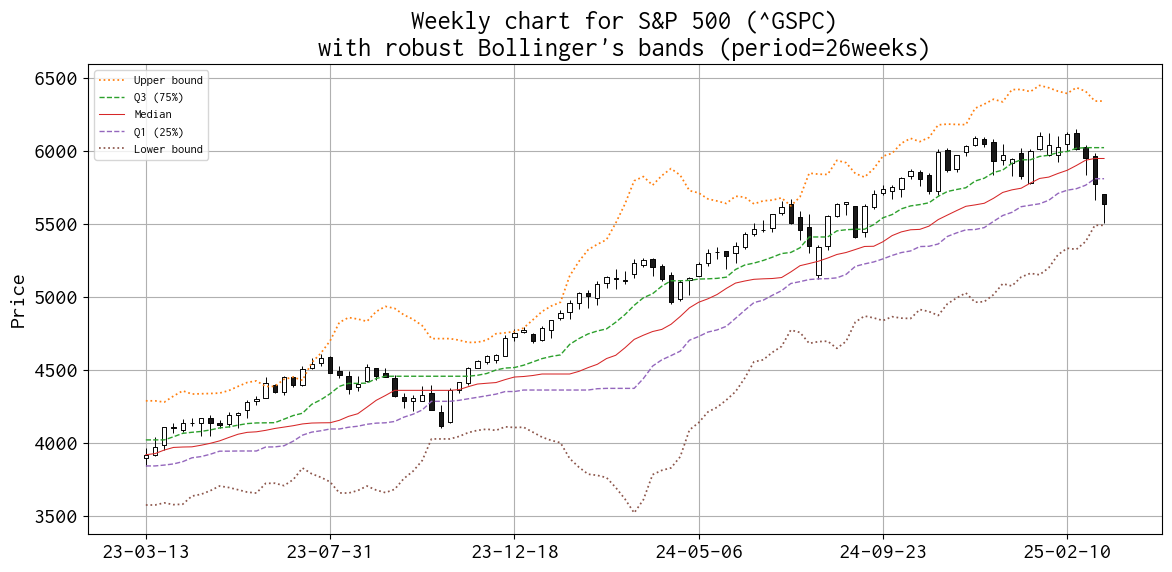

In [33]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=False,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=26weeks)' % symbol)

ax.grid()
ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

In [20]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-03 00:00:00-05:00,5968.330078,5986.089844,5666.290039,5770.200195,27908150000,0.0,0.0
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5504.649902,5638.939941,25881389000,0.0,0.0


In [7]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00-05:00    5770.200195
2025-03-10 00:00:00-04:00    5638.939941
Name: Close, dtype: float64

In [8]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00-05:00           NaN
2025-03-10 00:00:00-04:00   -131.260254
Name: Close, dtype: float64

In [9]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-10 00:00:00-04:00   -66.430176
dtype: float64

In [10]:
df['Close'].rolling(13).mean().tail()

Date
2025-02-10 00:00:00-05:00    6007.179237
2025-02-17 00:00:00-05:00    6010.547701
2025-02-24 00:00:00-05:00    6004.556941
2025-03-03 00:00:00-05:00    5979.936185
2025-03-10 00:00:00-04:00    5948.232347
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).mean().tail()

Date
2025-02-10 00:00:00-05:00    5872.513428
2025-02-17 00:00:00-05:00    5887.071890
2025-02-24 00:00:00-05:00    5898.844971
2025-03-03 00:00:00-05:00    5912.759597
2025-03-10 00:00:00-04:00    5913.256517
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(52).mean().tail()

Date
2025-01-27 00:00:00-05:00    11312.169002
2025-02-03 00:00:00-05:00    11383.494779
2025-02-10 00:00:00-05:00    11464.989014
2025-02-17 00:00:00-05:00    11529.661508
2025-02-24 00:00:00-05:00    11579.015437
Name: Close, dtype: float64

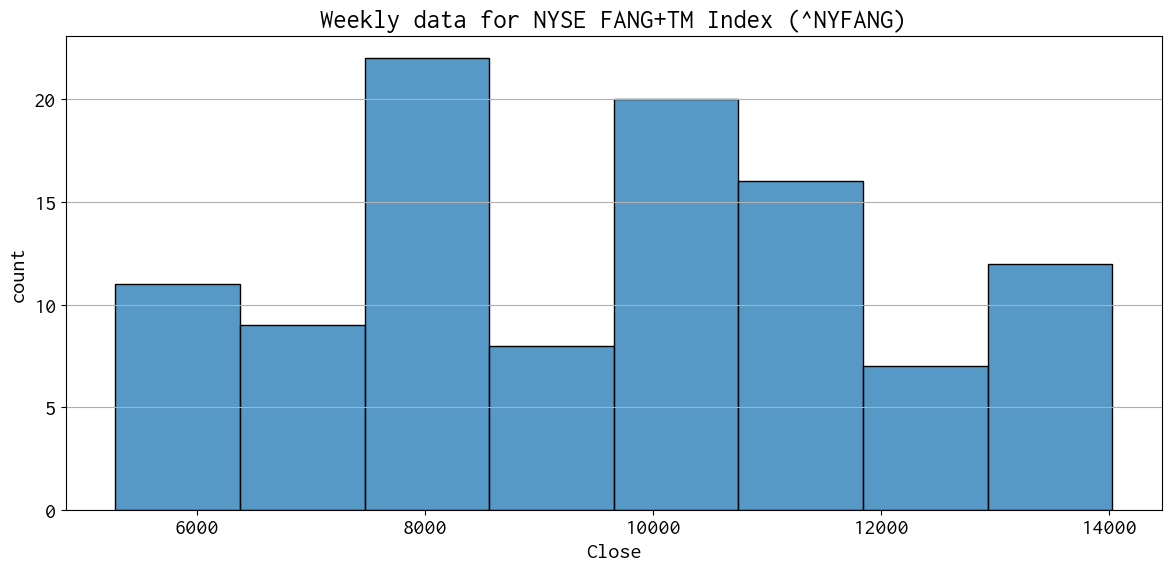

In [12]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_%s.png' % code)
plt.show()

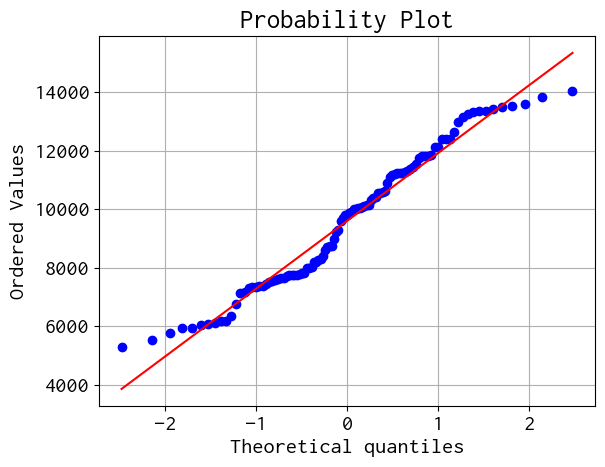

In [13]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [14]:
len(df)

105

In [15]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9624556204068881, p-value: 0.00456471323008903
